Cilj je u 2D-u predstaviti putanju bespilotne letelice od pocetnog stanja O, do krajnje pozicije T. Ulaz je brzina letelice i ugao kretanja, a tau_v i tau_theta nam predstavljaju vremenske parametre

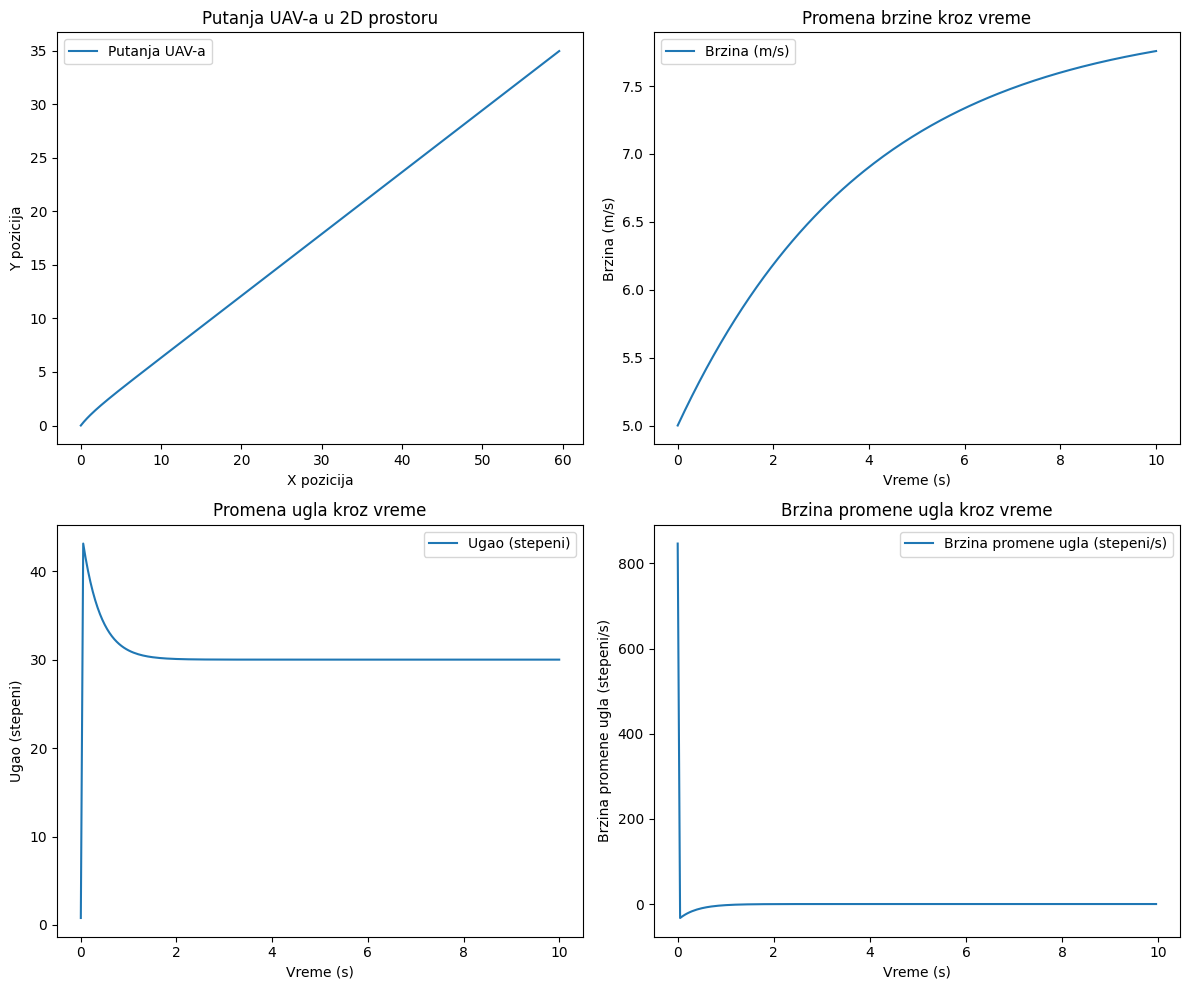

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri UAV-a
tau_v = 4  # vremenska konstanta za kontrolu brzine
tau_theta = 0.4  # vremenska konstanta za kontrolu ugla
v_max = 10  # maksimalna brzina (m/s)
v_min = 3   # minimalna brzina (m/s)
a_max = 3   # maksimalno ubrzanje (m/s^2)
omega_max = 2.618  # maksimalna brzina promene ugla (rad/s)

# Inicijalne vrednosti
v = 5.0  # početna brzina
theta = np.deg2rad(45)  # početni ugao (u radijanima)
x, y = 0, 0  # početne koordinate

# Kontrolni ulazi (kontrola brzine i ugla)
v_c = 8  # ciljana brzina
theta_c = np.deg2rad(30)  # ciljani ugao

# Vremenski parametri simulacije
T = 0.05  # vremenski korak
num_steps = 200  # broj koraka simulacije

# Čuvanje podataka za vizualizaciju
x_values, y_values = [x], [y]
v_values, theta_values = [v], [theta]

# Simulacija kretanja UAV-a
for step in range(num_steps):
    # Izračunavanje promena brzine i ugla
    v_dot = (v_c - v) / tau_v
    theta_dot = (theta_c - theta) / tau_theta

    # Ograničenje ubrzanja i promene ugla
    v_dot = np.clip(v_dot, -a_max, a_max)
    theta_dot = np.clip(theta_dot, -omega_max, omega_max)

    # Ažuriranje brzine i ugla
    v += v_dot * T
    theta += theta_dot * T

    # Ograničenje brzine
    v = np.clip(v, v_min, v_max)

    # Ažuriranje pozicije
    x += v * np.cos(theta) * T
    y += v * np.sin(theta) * T

    # Čuvanje vrednosti za plotovanje
    x_values.append(x)
    y_values.append(y)
    v_values.append(v)
    theta_values.append(np.rad2deg(theta))  # konvertovanje u stepeni za lakše razumevanje

# Plotovanje rezultata
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Putanja UAV-a
axs[0, 0].plot(x_values, y_values, label='Putanja UAV-a')
axs[0, 0].set_title('Putanja UAV-a u 2D prostoru')
axs[0, 0].set_xlabel('X pozicija')
axs[0, 0].set_ylabel('Y pozicija')
axs[0, 0].legend()

# Brzina kroz vreme
axs[0, 1].plot(np.arange(num_steps + 1) * T, v_values, label='Brzina (m/s)')
axs[0, 1].set_title('Promena brzine kroz vreme')
axs[0, 1].set_xlabel('Vreme (s)')
axs[0, 1].set_ylabel('Brzina (m/s)')
axs[0, 1].legend()

# Ugao kroz vreme
axs[1, 0].plot(np.arange(num_steps + 1) * T, theta_values, label='Ugao (stepeni)')
axs[1, 0].set_title('Promena ugla kroz vreme')
axs[1, 0].set_xlabel('Vreme (s)')
axs[1, 0].set_ylabel('Ugao (stepeni)')
axs[1, 0].legend()

# Brzina promene ugla kroz vreme
theta_dot_values = np.diff(theta_values) / T
axs[1, 1].plot(np.arange(num_steps) * T, theta_dot_values, label='Brzina promene ugla (stepeni/s)')
axs[1, 1].set_title('Brzina promene ugla kroz vreme')
axs[1, 1].set_xlabel('Vreme (s)')
axs[1, 1].set_ylabel('Brzina promene ugla (stepeni/s)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


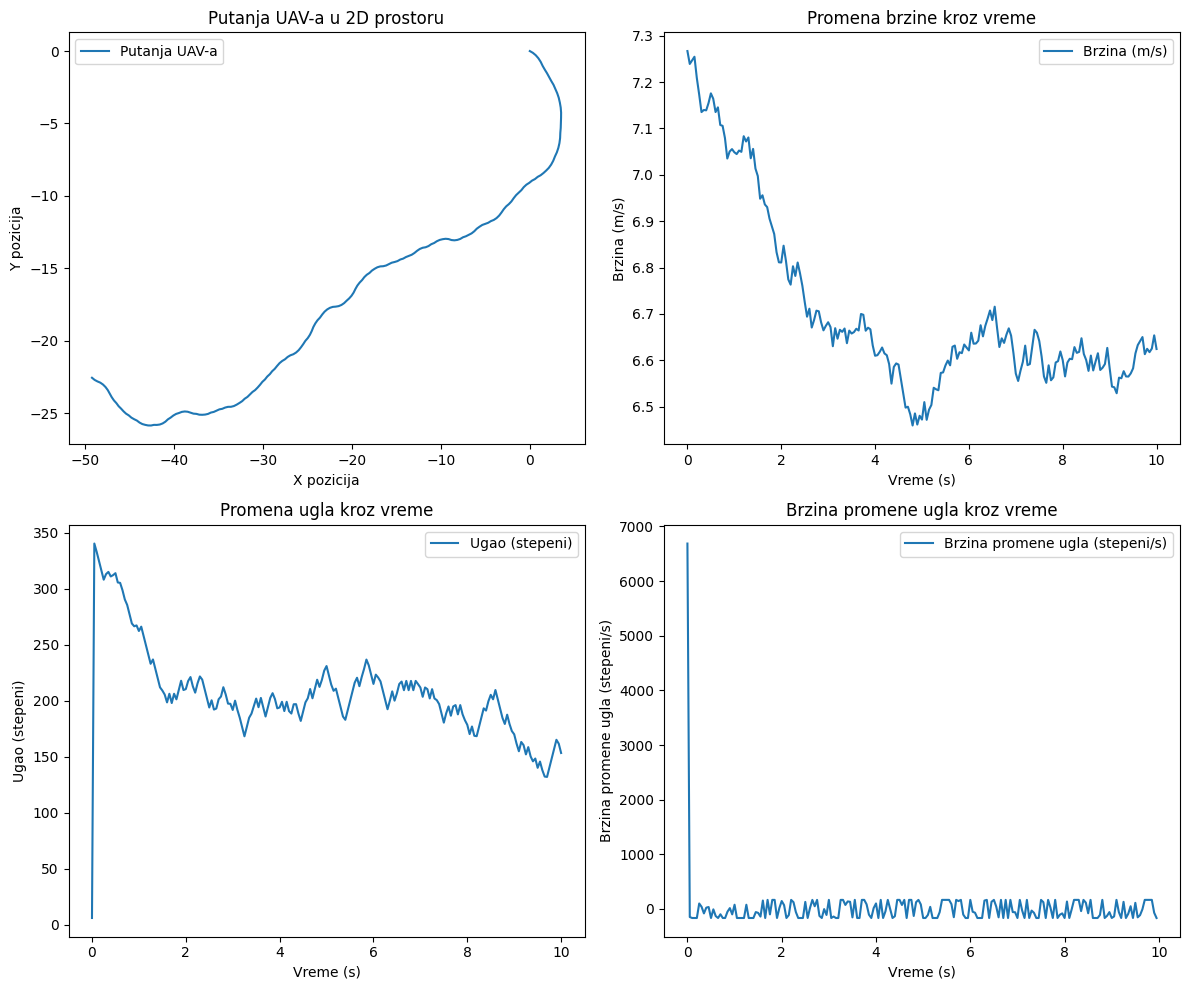

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Nasumično postavljanje parametara UAV-a iz određenih intervala
tau_v = np.random.uniform(3, 5)  # vremenska konstanta za kontrolu brzine (interval od 3 do 5)
tau_theta = np.random.uniform(0.3, 0.5)  # vremenska konstanta za kontrolu ugla (interval od 0.3 do 0.5)
v_max = np.random.uniform(8, 12)  # maksimalna brzina (m/s) (interval od 8 do 12)
v_min = np.random.uniform(2, 4)   # minimalna brzina (m/s) (interval od 2 do 4)
a_max = np.random.uniform(2, 4)   # maksimalno ubrzanje (m/s^2) (interval od 2 do 4)
omega_max = np.random.uniform(2, 3)  # maksimalna brzina promene ugla (rad/s) (interval od 2 do 3)

# Inicijalne vrednosti
v = np.random.uniform(3, 10)  # nasumična početna brzina između v_min i v_max
theta = np.deg2rad(np.random.uniform(0, 360))  # nasumičan početni ugao (u radijanima)
x, y = 0, 0  # početne koordinate

# Vremenski parametri simulacije
T = 0.05  # vremenski korak
num_steps = 200  # broj koraka simulacije

# Čuvanje podataka za vizualizaciju
x_values, y_values = [x], [y]
v_values, theta_values = [v], [theta]

# Simulacija kretanja UAV-a
for step in range(num_steps):
    # Nasumično generisanje kontrolnih ulaza
    v_c = np.random.uniform(3, 10)  # nasumična ciljana brzina između v_min i v_max
    theta_c = np.deg2rad(np.random.uniform(0, 360))  # nasumičan ciljani ugao

    # Izračunavanje promena brzine i ugla
    v_dot = (v_c - v) / tau_v
    theta_dot = (theta_c - theta) / tau_theta

    # Ograničenje ubrzanja i promene ugla
    v_dot = np.clip(v_dot, -a_max, a_max)
    theta_dot = np.clip(theta_dot, -omega_max, omega_max)

    # Ažuriranje brzine i ugla
    v += v_dot * T
    theta += theta_dot * T

    # Ograničenje brzine
    v = np.clip(v, v_min, v_max)

    # Ažuriranje pozicije
    x += v * np.cos(theta) * T
    y += v * np.sin(theta) * T

    # Čuvanje vrednosti za plotovanje
    x_values.append(x)
    y_values.append(y)
    v_values.append(v)
    theta_values.append(np.rad2deg(theta))  # konvertovanje u stepeni za lakše razumevanje

# Plotovanje rezultata
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Putanja UAV-a
axs[0, 0].plot(x_values, y_values, label='Putanja UAV-a')
axs[0, 0].set_title('Putanja UAV-a u 2D prostoru')
axs[0, 0].set_xlabel('X pozicija')
axs[0, 0].set_ylabel('Y pozicija')
axs[0, 0].legend()

# Brzina kroz vreme
axs[0, 1].plot(np.arange(num_steps + 1) * T, v_values, label='Brzina (m/s)')
axs[0, 1].set_title('Promena brzine kroz vreme')
axs[0, 1].set_xlabel('Vreme (s)')
axs[0, 1].set_ylabel('Brzina (m/s)')
axs[0, 1].legend()

# Ugao kroz vreme
axs[1, 0].plot(np.arange(num_steps + 1) * T, theta_values, label='Ugao (stepeni)')
axs[1, 0].set_title('Promena ugla kroz vreme')
axs[1, 0].set_xlabel('Vreme (s)')
axs[1, 0].set_ylabel('Ugao (stepeni)')
axs[1, 0].legend()

# Brzina promene ugla kroz vreme
theta_dot_values = np.diff(theta_values) / T
axs[1, 1].plot(np.arange(num_steps) * T, theta_dot_values, label='Brzina promene ugla (stepeni/s)')
axs[1, 1].set_title('Brzina promene ugla kroz vreme')
axs[1, 1].set_xlabel('Vreme (s)')
axs[1, 1].set_ylabel('Brzina promene ugla (stepeni/s)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


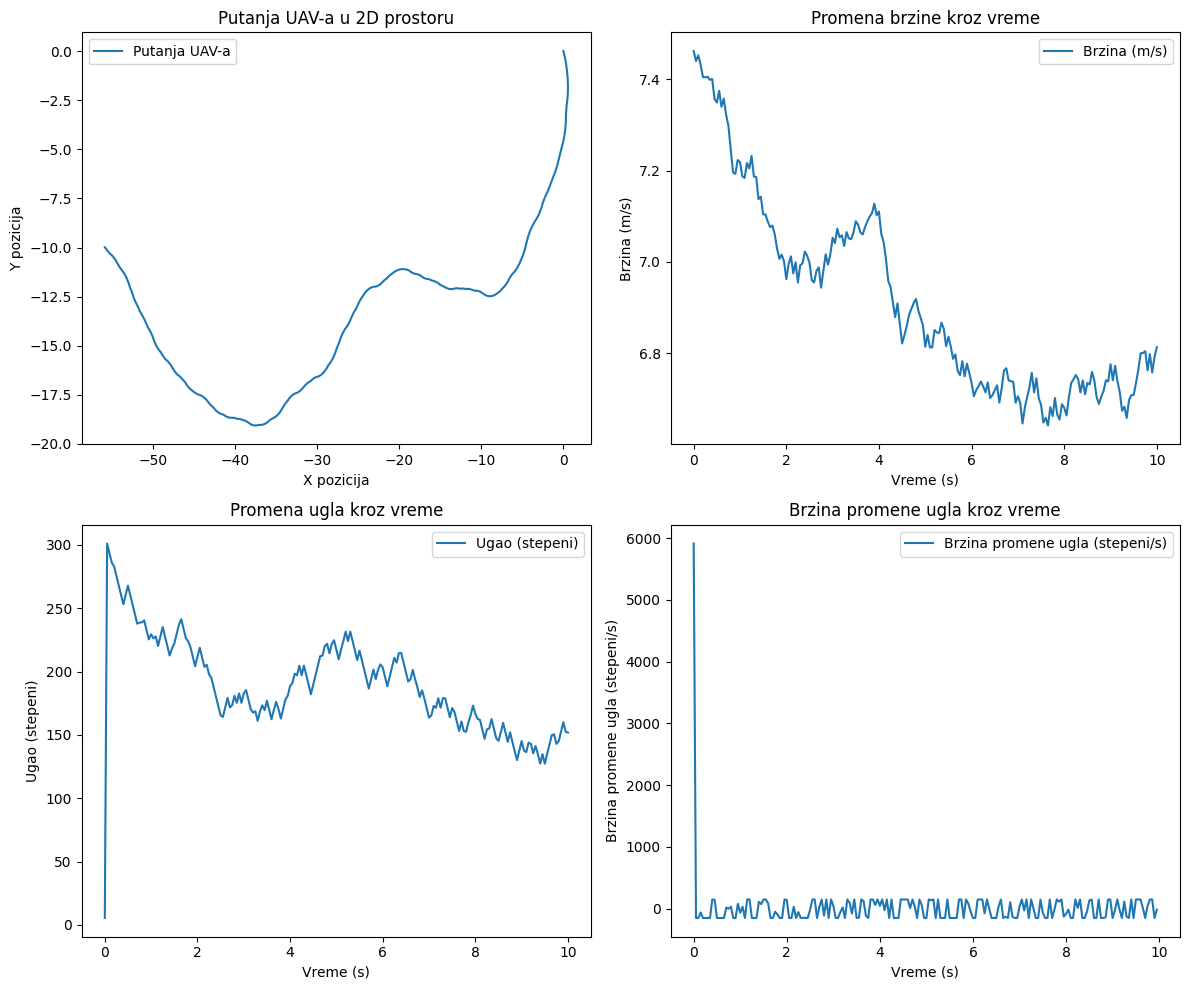

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri UAV-a
tau_v = 4  # vremenska konstanta za kontrolu brzine
tau_theta = 0.4  # vremenska konstanta za kontrolu ugla
v_max = 10  # maksimalna brzina (m/s)
v_min = 3   # minimalna brzina (m/s)
a_max = 3   # maksimalno ubrzanje (m/s^2)
omega_max = 2.618  # maksimalna brzina promene ugla (rad/s)

# Inicijalne vrednosti
v = np.random.uniform(3, 10)  # nasumična početna brzina između v_min i v_max
theta = np.deg2rad(np.random.uniform(0, 360))  # nasumičan početni ugao (u radijanima)
x, y = 0, 0  # početne koordinate

# Vremenski parametri simulacije
T = 0.05  # vremenski korak
num_steps = 200  # broj koraka simulacije

# Čuvanje podataka za vizualizaciju
x_values, y_values = [x], [y]
v_values, theta_values = [v], [theta]

# Simulacija kretanja UAV-a
for step in range(num_steps):
    # Nasumično generisanje kontrolnih ulaza
    v_c = np.random.uniform(3, 10)  # nasumična ciljana brzina između v_min i v_max
    theta_c = np.deg2rad(np.random.uniform(0, 360))  # nasumičan ciljani ugao

    # Izračunavanje promena brzine i ugla
    v_dot = (v_c - v) / tau_v
    theta_dot = (theta_c - theta) / tau_theta

    # Ograničenje ubrzanja i promene ugla
    v_dot = np.clip(v_dot, -a_max, a_max)
    theta_dot = np.clip(theta_dot, -omega_max, omega_max)

    # Ažuriranje brzine i ugla
    v += v_dot * T
    theta += theta_dot * T

    # Ograničenje brzine
    v = np.clip(v, v_min, v_max)

    # Ažuriranje pozicije
    x += v * np.cos(theta) * T
    y += v * np.sin(theta) * T

    # Čuvanje vrednosti za plotovanje
    x_values.append(x)
    y_values.append(y)
    v_values.append(v)
    theta_values.append(np.rad2deg(theta))  # konvertovanje u stepeni za lakše razumevanje

# Plotovanje rezultata
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Putanja UAV-a
axs[0, 0].plot(x_values, y_values, label='Putanja UAV-a')
axs[0, 0].set_title('Putanja UAV-a u 2D prostoru')
axs[0, 0].set_xlabel('X pozicija')
axs[0, 0].set_ylabel('Y pozicija')
axs[0, 0].legend()

# Brzina kroz vreme
axs[0, 1].plot(np.arange(num_steps + 1) * T, v_values, label='Brzina (m/s)')
axs[0, 1].set_title('Promena brzine kroz vreme')
axs[0, 1].set_xlabel('Vreme (s)')
axs[0, 1].set_ylabel('Brzina (m/s)')
axs[0, 1].legend()

# Ugao kroz vreme
axs[1, 0].plot(np.arange(num_steps + 1) * T, theta_values, label='Ugao (stepeni)')
axs[1, 0].set_title('Promena ugla kroz vreme')
axs[1, 0].set_xlabel('Vreme (s)')
axs[1, 0].set_ylabel('Ugao (stepeni)')
axs[1, 0].legend()

# Brzina promene ugla kroz vreme
theta_dot_values = np.diff(theta_values) / T
axs[1, 1].plot(np.arange(num_steps) * T, theta_dot_values, label='Brzina promene ugla (stepeni/s)')
axs[1, 1].set_title('Brzina promene ugla kroz vreme')
axs[1, 1].set_xlabel('Vreme (s)')
axs[1, 1].set_ylabel('Brzina promene ugla (stepeni/s)')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
